In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### dataset
https://www.kaggle.com/andrewmvd/suicide-dataset

In [2]:
sc = pd.read_csv('suicide_dataset.csv')
sc20 = pd.read_csv('Suicide rate.csv')
sc20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       182 non-null    object 
 1   Suicide rate  182 non-null    float64
 2   ISO-code      182 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.4+ KB


In [3]:
sc20['Year'] = 2020
sc20 = sc20.drop('ISO-code', axis=1)
sc20.rename(columns={'Suicide rate':'Suicide Rate'}, inplace=True)
sc20.head()

Country  Suicide Rate  Year
0          Afghanistan           6.4  2020
1              Albania           5.6  2020
2              Algeria           3.3  2020
3               Angola           8.9  2020
4  Antigua and Barbuda           0.5  2020

In [4]:
scdata = sc[['Country', 'Sex', 'Year', 'Suicide Rate']].copy()
scdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       2717 non-null   object 
 1   Sex           2196 non-null   object 
 2   Year          2717 non-null   int64  
 3   Suicide Rate  2196 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 85.0+ KB


In [5]:
scdata = scdata.dropna()
scdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2196 entries, 0 to 2195
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       2196 non-null   object 
 1   Sex           2196 non-null   object 
 2   Year          2196 non-null   int64  
 3   Suicide Rate  2196 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 85.8+ KB


In [6]:
scdata.head()

Country          Sex  Year  Suicide Rate
0  Afghanistan   Both sexes  2000           8.1
1  Afghanistan         Male  2000          14.3
2  Afghanistan       Female  2000           1.7
3      Albania   Both sexes  2000           5.8
4      Albania         Male  2000           8.2

In [7]:
tmp = scdata['Sex'][0] # both sexes
sc_df = scdata[scdata['Sex']==tmp].drop('Sex', axis=1)

In [8]:
sc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 2193
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       732 non-null    object 
 1   Year          732 non-null    int64  
 2   Suicide Rate  732 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.9+ KB


In [9]:
merged_sc = pd.concat([sc_df, sc20])
merged_sc.head()

Country  Year  Suicide Rate
0           Afghanistan  2000           8.1
3               Albania  2000           5.8
6               Algeria  2000           4.7
9                Angola  2000          13.9
12  Antigua and Barbuda  2000           2.1

In [10]:
merged_sc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 0 to 181
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       914 non-null    object 
 1   Year          914 non-null    int64  
 2   Suicide Rate  914 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 28.6+ KB


In [11]:
merged_sc.loc[merged_sc['Country']=='Republic of Korea', 'Country'] = 'South Korea'

In [12]:
hp = pd.read_csv('Happiness1521.csv')
hp_df = hp[(hp['Year']<=2017) | (hp['Year']==2020)]
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 934
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        623 non-null    int64  
 1   Region      623 non-null    object 
 2   Country     623 non-null    object 
 3   Score       623 non-null    float64
 4   Economy     623 non-null    float64
 5   Social      623 non-null    float64
 6   Health      623 non-null    float64
 7   Freedom     623 non-null    float64
 8   Generosity  623 non-null    float64
 9   Corruption  623 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 53.5+ KB


In [13]:
data = pd.merge(hp_df, merged_sc, on=['Year', 'Country'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 414
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          415 non-null    int64  
 1   Region        415 non-null    object 
 2   Country       415 non-null    object 
 3   Score         415 non-null    float64
 4   Economy       415 non-null    float64
 5   Social        415 non-null    float64
 6   Health        415 non-null    float64
 7   Freedom       415 non-null    float64
 8   Generosity    415 non-null    float64
 9   Corruption    415 non-null    float64
 10  Suicide Rate  415 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 38.9+ KB


In [14]:
data.head()

Year                 Region      Country  Score  Economy   Social   Health  \
0  2015         Western Europe  Switzerland  7.587  1.39651  1.34951  0.94143   
1  2015         Western Europe      Iceland  7.561  1.30232  1.40223  0.94784   
2  2015         Western Europe      Denmark  7.527  1.32548  1.36058  0.87464   
3  2015         Western Europe       Norway  7.522  1.45900  1.33095  0.88521   
4  2015  North America and ANZ       Canada  7.427  1.32629  1.32261  0.90563   

   Freedom  Generosity  Corruption  Suicide Rate  
0  0.66557     0.29678     0.41978          11.4  
1  0.62877     0.43630     0.14145          12.9  
2  0.64938     0.34139     0.48357           8.6  
3  0.66973     0.34699     0.36503          10.2  
4  0.63297     0.45811     0.32957          10.5

In [15]:
hp_rate = data.groupby('Country')['Score'].mean().sort_values()
sc_rate = data.groupby('Country')['Suicide Rate'].mean().sort_values(ascending=False)

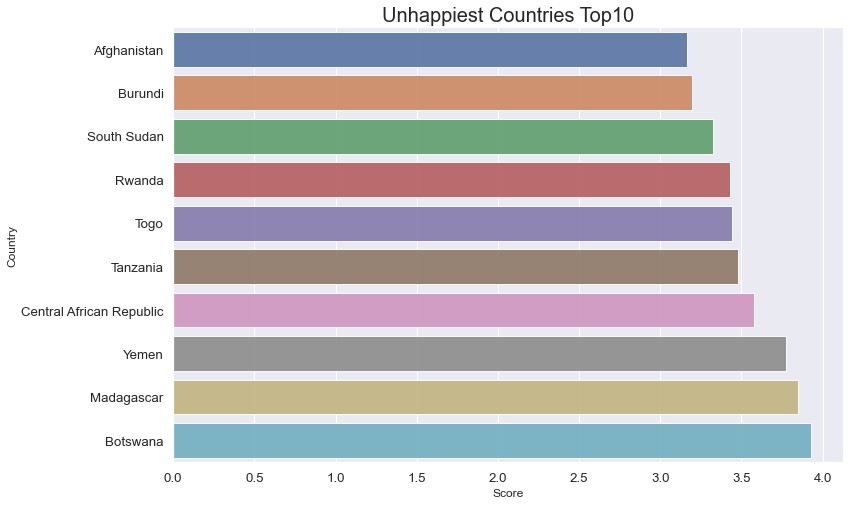

In [16]:
plt.rcParams['figure.figsize'] = (12,8)


unhp = hp_rate[:10]
sns.set(style="darkgrid", font_scale = 1.2)
sns.barplot(unhp.values, unhp.index, alpha=0.9)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Unhappiest Countries Top10', fontsize=20)
plt.show()

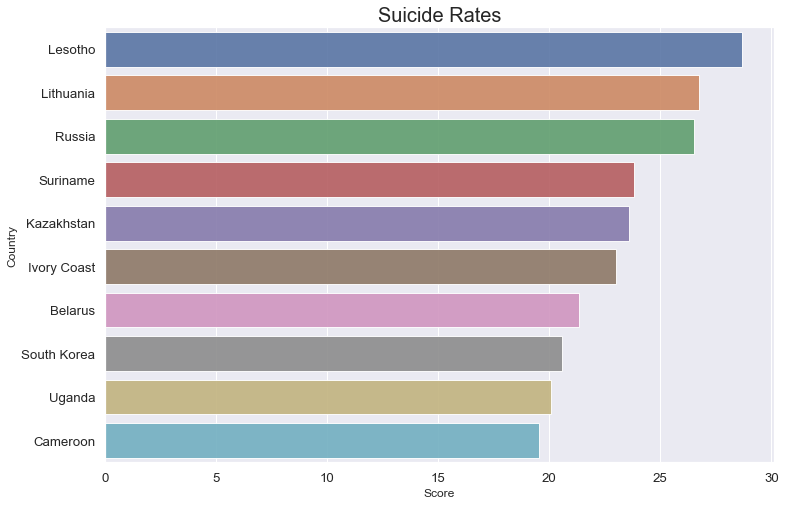

In [17]:
sctop = sc_rate[:10]
sns.set(style="darkgrid", font_scale = 1.2)
sns.barplot(sctop.values, sctop.index, alpha=0.9)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Suicide Rates', fontsize=20)
plt.show()

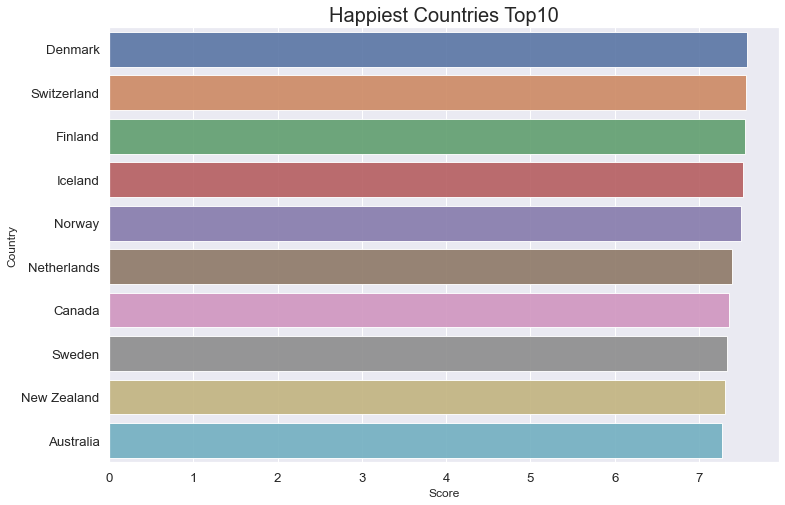

In [18]:
hp10 = hp_rate[-10:].sort_values(ascending=False)
sns.set(style="darkgrid", font_scale = 1.2)
sns.barplot(hp10.values, hp10.index, alpha=0.9)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Happiest Countries Top10', fontsize=20)
plt.show()

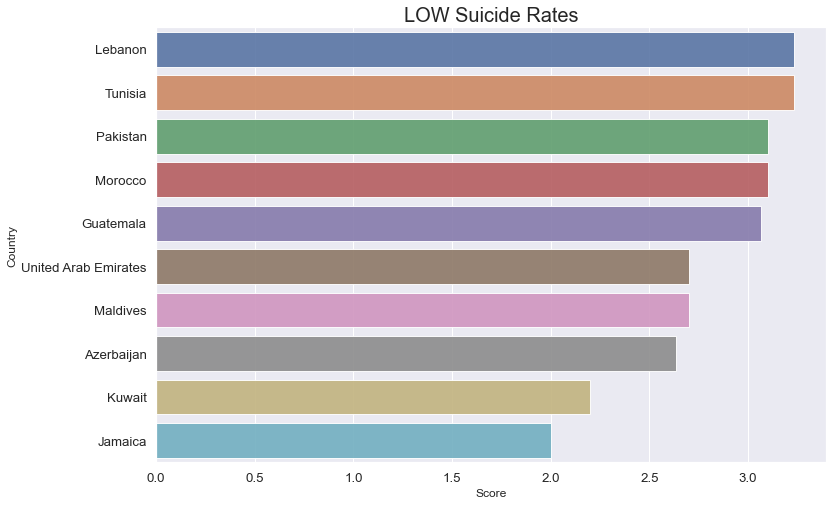

In [24]:
live = sc_rate[-10:].sort_values(ascending=False)
sns.set(style="darkgrid", font_scale = 1.2)
sns.barplot(live.values, live.index, alpha=0.9)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('LOW Suicide Rates', fontsize=20)
plt.show()

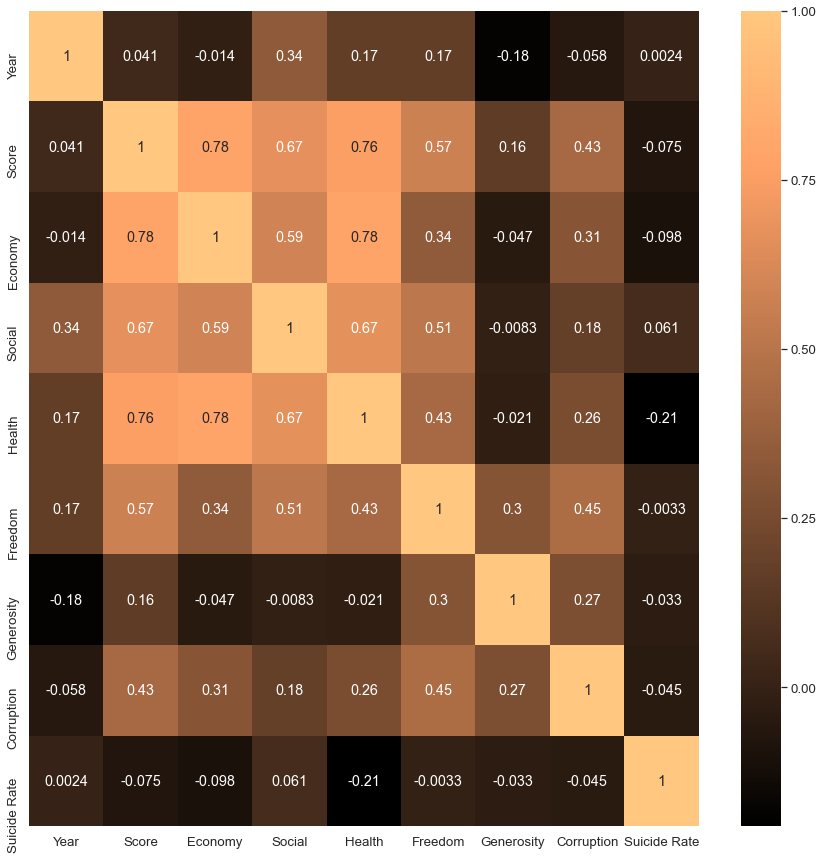

In [31]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), cmap = 'copper', annot = True)
sns.set(font_scale = 1.1)
plt.show()

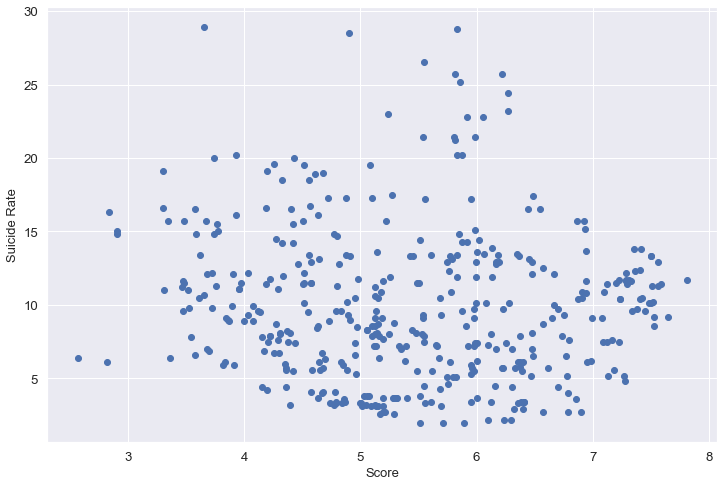

In [21]:
plt.scatter(data['Score'], data['Suicide Rate'])
plt.xlabel('Score', fontsize=13)
plt.ylabel('Suicide Rate', fontsize=13)
plt.show()

In [22]:
# 상관계수
corr = data[['Score', 'Suicide Rate']].corr(method='pearson')
corr

Score  Suicide Rate
Score         1.000000     -0.074856
Suicide Rate -0.074856      1.000000

In [23]:
import scipy.stats as stats

corr, pValue = stats.pearsonr(data['Suicide Rate'], data['Score'])
print(corr, pValue)

-0.07485559790091485 0.12789346220372252


상관 관계가 없다